In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/classification_decisiontree_Ex1.csv')
df

cid   R   F           M customer_value
0          1069  19   4   486.00000              M
1          1113  54   4   557.50000              M
2          1250  19   2   791.50000              M
3          1359  87   1   364.00000              L
4          1823  36   3   869.00000              M
...         ...  ..  ..         ...            ...
32261   2179544   1   1  3753.00000              M
32262   2179568   1   1   406.00000              L
32263   2179605   1   1  6001.00000              M
32264   2179643   1   1   887.00000              L
32265  20002000  24  27  1814.62963              H

[32266 rows x 5 columns]

In [ ]:
CustomerData = df[['R', 'F', 'M']]
CustomerData.head()

R  F      M
0  19  4  486.0
1  54  4  557.5
2  19  2  791.5
3  87  1  364.0
4  36  3  869.0

In [ ]:
CustomerTagret = df['customer_value']
CustomerTagret[:5]

0    M
1    M
2    M
3    L
4    M
Name: customer_value, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    CustomerData,
    CustomerTagret,
    train_size = 0.75,
    stratify = CustomerTagret,
    random_state = 42
)

print("X_train: {:.0f}".format(len(X_train)))
print("X_test: {:.0f}".format(len(X_test)))
print("y_train: {:.0f}".format(len(y_train)))
print("y_test: {:.0f}".format(len(y_test)))

X_train: 24199
X_test: 8067
y_train: 24199
y_test: 8067


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
myDT = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
myDT

DecisionTreeClassifier(max_depth=3)

In [ ]:
myDT.fit(X_train, y_train)
myDT

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred = myDT.predict(X_test)
y_pred

array(['H', 'H', 'L', ..., 'L', 'L', 'H'], dtype=object)

In [ ]:
from sklearn import metrics

In [ ]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(acc))

Accuracy: 0.81


In [ ]:
mycm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', mycm)

Confusion Matrix: 
 [[2355    9  359]
 [   1 2266  235]
 [ 277  630 1935]]


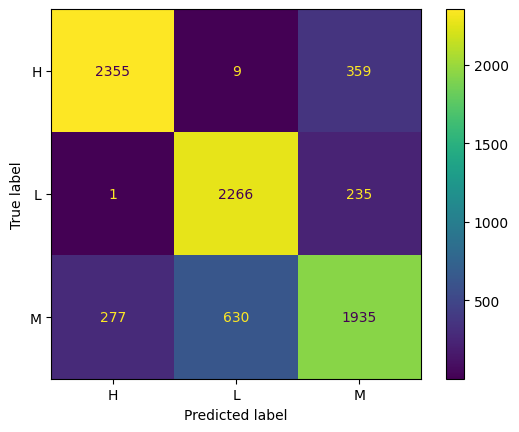

In [ ]:
metrics.ConfusionMatrixDisplay(confusion_matrix = mycm, display_labels = myDT.classes_).plot()

In [ ]:
newdata = [[5.0, 2.0, 2100], [1.0, 6.0, 5000]]
print(newdata)
y_newpred_c = myDT.predict(newdata)
print(y_newpred_c)

[[5.0, 2.0, 2100], [1.0, 6.0, 5000]]
['M' 'H']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'x[1] <= 3.5\ngini = 0.666\nsamples = 24199\nvalue = [8170, 7504, 8525]'),
 Text(0.25, 0.625, 'x[2] <= 796.167\ngini = 0.588\nsamples = 16552\nvalue = [1722, 7392, 7438]'),
 Text(0.125, 0.375, 'x[1] <= 1.5\ngini = 0.353\nsamples = 8741\nvalue = [37, 6752, 1952]'),
 Text(0.0625, 0.125, 'gini = 0.011\nsamples = 4811\nvalue = [0, 4785, 26]'),
 Text(0.1875, 0.125, 'gini = 0.509\nsamples = 3930\nvalue = [37, 1967, 1926]'),
 Text(0.375, 0.375, 'x[1] <= 2.5\ngini = 0.453\nsamples = 7811\nvalue = [1685, 640, 5486]'),
 Text(0.3125, 0.125, 'gini = 0.373\nsamples = 6412\nvalue = [801, 640, 4971]'),
 Text(0.4375, 0.125, 'gini = 0.465\nsamples = 1399\nvalue = [884, 0, 515]'),
 Text(0.75, 0.625, 'x[1] <= 5.5\ngini = 0.269\nsamples = 7647\nvalue = [6448, 112, 1087]'),
 Text(0.625, 0.375, 'x[2] <= 582.2\ngini = 0.466\nsamples = 3319\nvalue = [2206, 111, 1002]'),
 Text(0.5625, 0.125, 'gini = 0.514\nsamples = 1259\nvalue = [351, 111, 797]'),
 Text(0.6875, 0.125, 'gini = 0.179\nsamples 

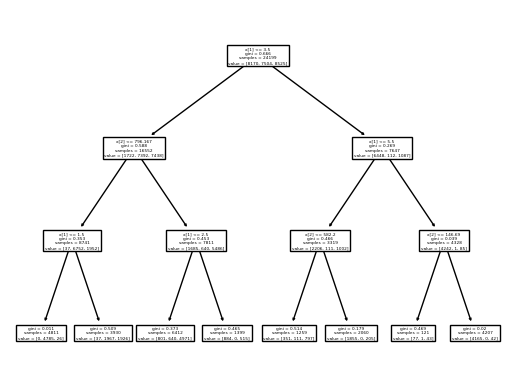

In [ ]:
plot_tree(myDT)
#plot_tree(myDT, filled = True)

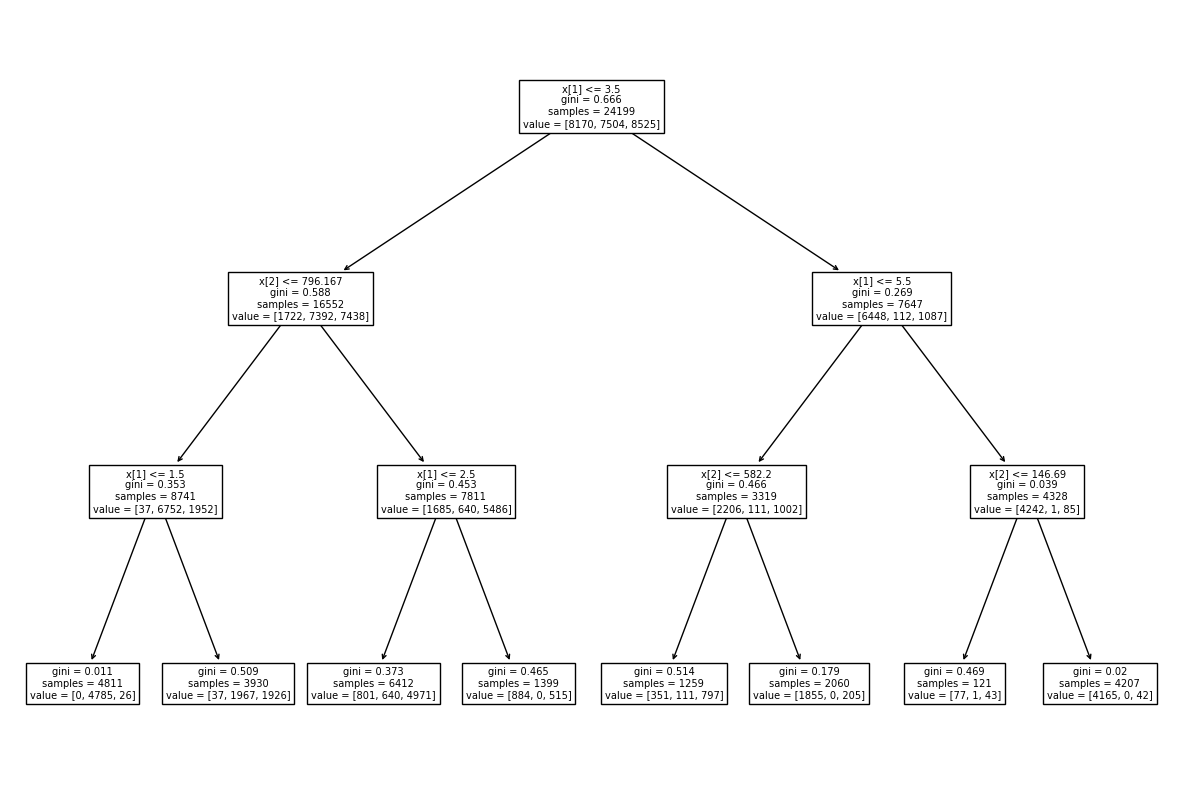

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plot_tree(myDT)

plt.show()

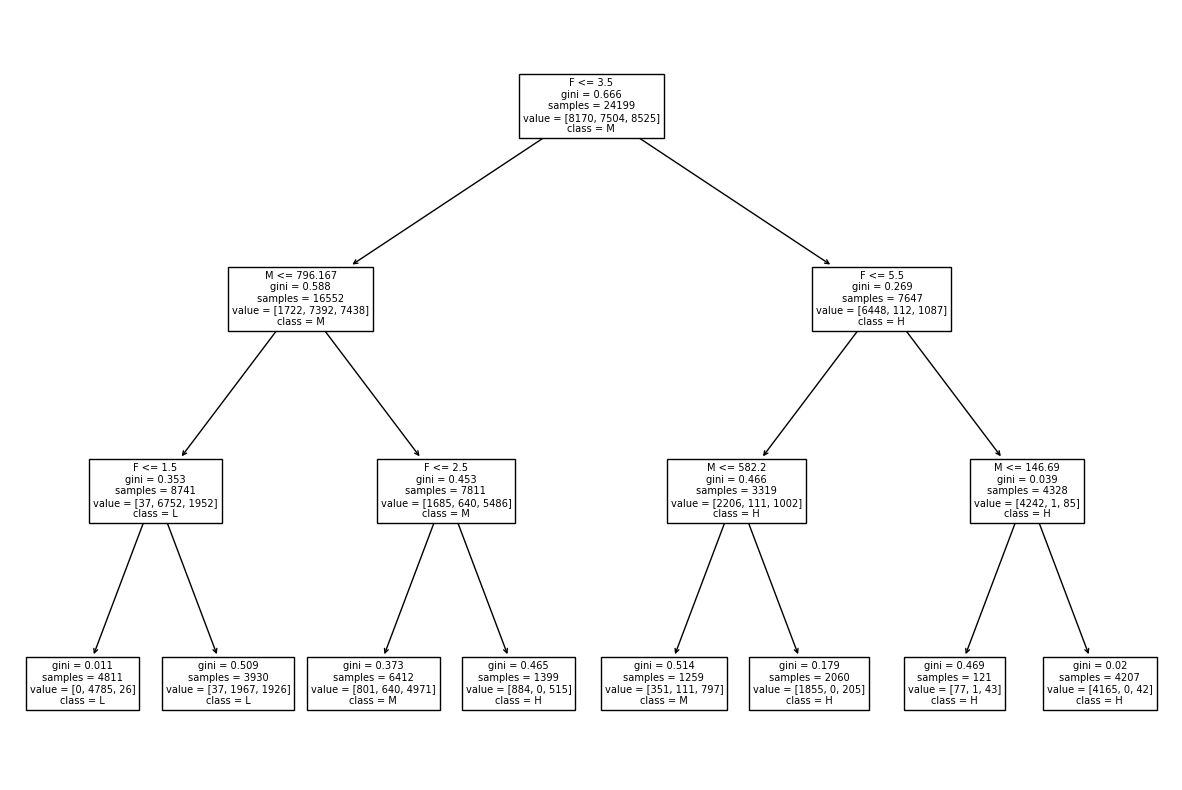

In [ ]:
plt.figure(figsize=(15,10))
A = ['H', 'L', 'M']
F = ['R', 'F', 'M']
plot_tree(myDT, feature_names = F, class_names = A)

plt.show()

In [ ]:
#進階補充(如果已經熟悉上述功能之後再試試看這一段)

#需求:請嘗試看看套顏色參數的效果 filled = True
"""
plt.figure(figsize=(15,10))
A = ['H', 'L', 'M']
F = ['R', 'F', 'M']
plot_tree(myDT, feature_names = F, class_names = A, filled = True)

plt.show()
"""

"\nplt.figure(figsize=(15,10))\nA = ['H', 'L', 'M']\nF = ['R', 'F', 'M']\nplot_tree(myDT, feature_names = F, class_names = A, filled = True)\n\nplt.show()\n"

進階補充：  
這一段主要是說明：當模型經過測試階段完成後，所產生的混淆矩陣數據該如何解讀呢?
即「怎麼去評估我們訓練出來的模型，模型分類(或預測)的成效(Performance)好不好」。
所以我們需要去產生一份評估模型分類(或預測)成效(或稱績效)綜合指標報告(report)，
在Python中可以引用classification_report()函數幫忙產生這份成效報告。

In [ ]:
#from sklearn.metrics import classification_report

In [ ]:
#classification_report(y_test, y_pred)

In [ ]:
#用print()報告格式較為整齊
#print(classification_report(y_test, y_pred))

實際與預測類別的數量

In [ ]:
#實際類別的H、M、L數量
#y_test.value_counts()

In [ ]:
#預測類別的H、M、L數量
#pd.Series(y_pred).value_counts()

類別值與機率值

In [ ]:
#y_pred

In [ ]:
#y_pred_p = myDT.predict_proba(X_test)
#print(y_pred_p)